In [1]:
import numpy as np
import pandas as pd
import pylab

import scipy
import scipy.cluster.hierarchy as sch
import scipy.stats as sp

from IPython.display import display

import utils
import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def write_gene_list(degs, filename):
    with open('yuge/gene_lists/" + filename + ".txt', 'w') as f:
        for probe in degs:
            f.write("%s\n" % probe)
    
#Plotting
import matplotlib.pyplot as plt

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

#Tools
import scanpy as sc
import anndata #really just using this, not scanpy
import gseapy as gp

# Load Data

In [2]:
chandni_anova_probes = ["201578_at","214203_s_at","219815_at","219695_at","201896_s_at","205157_s_at","212236_x_at","230606_at","235857_at","216748_at","201939_at","218346_s_at","1554367_at","220073_s_at","220756_s_at","1554547_at","204736_s_at","201286_at","204566_at","227816_at","209652_s_at","209290_s_at","229382_at","239332_at","210609_s_at","215407_s_at","231950_at","201834_at","219938_s_at","229245_at","218180_s_at","226124_at","229254_at","214297_at","226435_at","202686_s_at","209498_at","234644_x_at","219412_at","227522_at","218124_at","231115_at","1558368_s_at","226534_at","209462_at","234726_s_at","213375_s_at","214761_at","229030_at","240413_at","222354_at","218962_s_at","230330_at","218902_at","225055_at","231478_at","236641_at","240252_at","235352_at","238733_at","214745_at","232899_at","222958_s_at","210670_at","223179_at","218288_s_at","236245_at","1552599_at","1569318_at","220476_s_at","228128_x_at","243099_at","204962_s_at","229699_at","205569_at","242400_at","227020_at","221576_at","211163_s_at","211889_x_at","239988_at","210821_x_at","203845_at","239824_s_at","227345_at","226793_at","235200_at","206222_at","226363_at","211883_x_at","218657_at","206576_s_at","203409_at","242978_x_at","210605_s_at","225522_at","1555981_at","230632_at","219179_at","238454_at","209289_at","201061_s_at","236055_at","237063_at","224674_at","236036_at","205046_at","207194_s_at","209693_at","207566_at","228293_at","232077_s_at","208779_x_at","235627_at","206515_at","225470_at","226111_s_at","226649_at","235698_at","1007_s_at","227735_s_at","213029_at","244616_x_at","204224_s_at","208004_at","1566472_s_at","214760_at","238622_at","203081_at","1559226_x_at","227306_at","202055_at","235763_at","207565_s_at","230509_at","202794_at","239697_x_at","1559322_at","204857_at","221756_at","227102_at","227736_at","231017_at","201302_at","203764_at","1554256_a_at","218581_at","218512_at","232849_at","217104_at","236512_at","221258_s_at","218634_at","213658_at","1563498_s_at","214710_s_at","213996_at","203846_at","201887_at","223413_s_at","222291_at","206514_s_at","218769_s_at","218755_at","237891_at","224724_at","223204_at","207813_s_at","220295_x_at","210223_s_at","220416_at","1557114_a_at","203499_at","221864_at","205531_s_at","222577_at","201506_at","1552846_s_at","238134_at","209183_s_at","227134_at","207169_x_at","205093_at","1559224_at","216080_s_at","1560590_s_at","229145_at","226013_at","225525_at","235460_at","201930_at","226342_at","227564_at","215843_s_at","213884_s_at","215722_s_at","229810_at","212851_at","225300_at","201508_at","231019_x_at","201196_s_at","223174_at","224433_s_at","228033_at","230188_at","221577_x_at","208080_at","209375_at","202138_x_at","229868_s_at","1561082_at","1560531_at","203622_s_at","206170_at","230631_s_at","215688_at","204257_at","203418_at","1561045_a_at","211762_s_at","232165_at","224391_s_at","227031_at","212507_at","218168_s_at","226018_at","226456_at","203580_s_at","206785_s_at","235776_x_at","1565549_at","210452_x_at","218886_at","222271_at","227108_at","236682_at","201416_at","217542_at","232335_at","210052_s_at","232238_at","216482_x_at","215229_at","226157_at","1562684_at","207828_s_at","210224_at","204827_s_at","212799_at","227964_at","227221_at","230012_at","228394_at","233555_s_at","229711_s_at","200921_s_at","220732_at","238559_at","226129_at","215942_s_at","237737_at","211466_at","210749_x_at","213885_at","223759_s_at","209917_s_at","225093_at","225629_s_at","235924_at","203180_at","238590_x_at","214890_s_at","201417_at","225049_at","219566_at","1562939_at","210886_x_at","239872_at","239503_at","223044_at","204803_s_at","202870_s_at","220083_x_at","225824_at","226581_at","206364_at","225885_at","225943_at","243515_at","217731_s_at","233413_at","230483_at","243843_at","37860_at","207103_at","210241_s_at","216941_s_at","207996_s_at","223468_s_at","226998_at","205922_at","209725_at","235534_at","204092_s_at","207434_s_at","209324_s_at","1558960_a_at","1561149_at","204318_s_at","223055_s_at","208935_s_at","212738_at","221757_at","1564257_at","235425_at","200948_at","220449_at","204379_s_at","226388_at","226923_at","201814_at","212271_at","1563057_at","207348_s_at","236882_at","1552987_a_at","205240_at","205135_s_at","219936_s_at","1553971_a_at","217167_x_at","209971_x_at","233238_s_at","244668_at","216212_s_at","229006_at","212409_s_at","241943_at","225725_at","211150_s_at","227247_at","216977_x_at","224482_s_at","1555906_s_at","242056_at","241725_at","1556571_at","204123_at","201301_s_at","242657_at","204802_at","226287_at","235545_at","1554627_a_at","223315_at","232164_s_at","231928_at","228050_at","203610_s_at","200762_at","242957_at","211692_s_at","203638_s_at","220400_at","219336_s_at","218594_at","209753_s_at","233016_at","205674_x_at","215228_at","223196_s_at","202240_at","222270_at","238721_at","205500_at","209172_s_at","208079_s_at","210484_s_at","208941_s_at","230791_at","235571_at","1555905_a_at","1554992_at","215241_at","202954_at","226688_at","212744_at","216041_x_at","215739_s_at","232116_at","201144_s_at","1552703_s_at","218016_s_at","224714_at","214051_at","229202_at","233852_at","211472_at","212611_at","1554493_s_at","223721_s_at","212331_at","202349_at","223250_at","230887_at","234168_at","212141_at","201479_at","218622_at","201277_s_at","200635_s_at","212028_at","224378_x_at","223035_s_at","205220_at","211284_s_at","226158_at","220938_s_at","200645_at","1568765_at","226685_at","223267_at","209002_s_at","244340_x_at","209245_s_at","209642_at","1565650_at","201510_at","204635_at","211091_s_at","213189_at","236175_at","210827_s_at","229957_at","223518_at","225223_at","1569335_a_at","210904_s_at","228073_at","208289_s_at","232057_at","214889_at","235360_at","227168_at","213293_s_at","203373_at","212752_at","226002_at","225161_at","214194_at","211040_x_at","201457_x_at","225278_at","240497_at","233873_x_at","237293_at","226447_at","218123_at","212458_at","202628_s_at","239943_x_at","226643_s_at","210610_at","227749_at","37577_at","202627_s_at","223195_s_at","205386_s_at","209584_x_at","224329_s_at","219918_s_at","209853_s_at","225834_at","1552763_at","1558290_a_at","204781_s_at","1569338_at","219383_at","244074_at","1569144_a_at","212246_at","225866_at","204905_s_at","37590_g_at","1556332_at","232278_s_at","200987_x_at","226261_at","203725_at","242023_at","209050_s_at","235953_at","205895_s_at","219081_at","240354_at","1556173_a_at","231939_s_at","1570469_at","218518_at","237229_at","218365_s_at","1557113_at","205266_at","229351_at","223227_at","214537_at","244770_at","205416_s_at","211734_s_at","1554082_a_at","214153_at","225912_at","227138_at","200753_x_at","210567_s_at","244040_at","201236_s_at","210528_at","242329_at","227466_at","1562879_at","225683_x_at","1555976_s_at","215008_at","208842_s_at","214887_at","203132_at","218027_at","202531_at","242365_at","1558444_at","220000_at","200678_x_at","223308_s_at","227567_at","217837_s_at","200761_s_at","211949_s_at","208890_s_at","201138_s_at","205902_at","241364_at","200722_s_at","209645_s_at","208624_s_at","235451_at","220872_at","238432_at","208407_s_at","221824_s_at","240099_at","219010_at","201060_x_at","205184_at","201835_s_at","221014_s_at","204492_at","47773_at","215807_s_at","202705_at","224952_at","214791_at","212221_x_at","221679_s_at","212621_at","203989_x_at","226657_at","208089_s_at","243087_at","211080_s_at","1563793_at","205391_x_at","207087_x_at","218235_s_at","1569069_s_at","241546_at","214659_x_at","225748_at","201287_s_at","216486_x_at","212737_at","235119_at","223999_at","214959_s_at","1560752_at","224941_at","204420_at","229842_at","220263_at","203150_at","208906_at","1562153_a_at","223151_at","212075_s_at","236469_at","208777_s_at","222630_at","211017_s_at","209295_at","217260_x_at","204859_s_at","206310_at","201663_s_at","224558_s_at","241193_at","226476_s_at","215509_s_at","230435_at","213365_at","1560049_at","201478_s_at","200064_at","211450_s_at","222608_s_at","225123_at","227190_at","224940_s_at","223268_at","232034_at","235328_at","203702_s_at","241334_at","1557029_at","52164_at","1559462_at","1569339_s_at","222684_s_at","239582_at","206163_at","223713_at","225532_at","219420_s_at","201081_s_at","1565787_at","202056_at","201847_at","220658_s_at","229343_at","213983_s_at","225931_s_at","238071_at","218854_at","219992_at","210436_at","201436_at","205354_at","226203_at","230714_s_at","239585_at","235245_at","226169_at","1558460_at","206060_s_at","225634_at","210250_x_at","1554696_s_at","213558_at","223314_at","230908_at","206493_at","213958_at","213242_x_at","205239_at","213725_x_at","225439_at","1565756_a_at","206011_at","221973_at","200598_s_at","208778_s_at","223405_at","228549_at","1560792_at","220520_s_at","221812_at","241739_at","218592_s_at","234217_at","238492_at","214634_at","204239_s_at","213820_s_at","219960_s_at","1560684_x_at","236574_at","202284_s_at","224495_at","225224_at","221589_s_at","242352_at","210012_s_at","232023_at","219544_at","221642_at","218859_s_at","209182_s_at","239339_at","219148_at","223996_s_at","225638_at","224575_at","208414_s_at","1559315_s_at","222986_s_at","204911_s_at","213469_at","242372_s_at","202824_s_at","1552619_a_at","240058_at","244609_at","213032_at","209825_s_at","213076_at","1559240_at","215046_at","225883_at","217775_s_at","237616_at","1556624_at","242535_at","207776_s_at","1557555_at","233921_s_at","215209_at","217783_s_at","222676_at","239012_at","224618_at","218947_s_at","1566161_at","202470_s_at","223258_s_at","238893_at","232616_at","225712_at","205910_s_at","219654_at","224617_at","227191_at","208651_x_at","230954_at","1562289_at","223709_s_at","214805_at","237241_at","208696_at","225215_s_at","214507_s_at","243260_x_at","209709_s_at","237464_at","201311_s_at","218976_at","215132_at","229267_at","201010_s_at","215854_at","1569746_s_at","219154_at","212077_at","209067_s_at","207707_s_at","209861_s_at","205831_at","212400_at","214874_at","201929_s_at","226208_at","222785_x_at","208107_s_at","218238_at","235659_at","1554816_at","227371_at","202340_x_at","225124_at","212206_s_at","226196_s_at","221210_s_at","228153_at","1564653_s_at","213657_s_at","241420_at","205717_x_at","216249_at","214987_at","226642_s_at","1569615_at","201718_s_at","221867_at","228977_at","233369_at","208515_at","218726_at","222477_s_at","216316_x_at","224524_s_at","237701_at","227965_at","222675_s_at","243504_at","210415_s_at","203755_at","201350_at","236962_at","1554485_s_at","213907_at","230723_at","219625_s_at","221685_s_at","229832_x_at","212987_at","205493_s_at","226245_at","217833_at","1563321_s_at","1555202_a_at","1558692_at","1566980_at","227792_at","243212_at","239471_at","218840_s_at","213183_s_at","239067_s_at","225864_at","222122_s_at","209325_s_at","244767_at","209133_s_at","202363_at","233485_at","1554671_a_at","218181_s_at","35820_at","221535_at","226449_at","208683_at","240825_at","202199_s_at","1557790_at","232988_at","222755_s_at","233177_s_at","207625_s_at","225722_at","230761_at","239002_at","236139_at","1563646_a_at","229200_at","200877_at","1556899_at","239278_at","223695_s_at","207351_s_at","211337_s_at","211363_s_at","229968_at","218611_at","225485_at","201717_at","201927_s_at","212745_s_at","226507_at","204436_at","214692_s_at","235866_at","227823_at","202899_s_at","223696_at","1562777_at","203066_at","226262_at","1570618_at","229221_at","201608_s_at","222421_at","219821_s_at","230131_x_at","212016_s_at","233803_s_at","204843_s_at","235427_at","232839_at","208352_x_at","213714_at","226855_at","1553743_at","242731_x_at","209079_x_at","230291_s_at","231807_at","204808_s_at","204061_at","1558685_a_at","236273_at","217730_at","1556925_at","235691_at","219013_at","244663_at","231597_x_at","227172_at","215819_s_at","201183_s_at","221736_at","1563488_at","1560347_at","222129_at","215215_s_at","202657_s_at","234341_x_at","212379_at","228429_x_at","226093_at","224399_at","226580_at","209497_s_at","240353_s_at","209899_s_at","223095_at","207264_at","1563841_at","224956_at","228209_at","228528_at","218857_s_at","220699_s_at","1554438_at","212022_s_at","226661_at","232569_at","221520_s_at","235502_at","202073_at","211066_x_at","205219_s_at","223466_x_at","218175_at","222408_s_at","234542_at","225631_at","222035_s_at","56256_at","228307_at","204514_at","218586_at","39763_at","221987_s_at","225611_at","218605_at","229549_at","219460_s_at","215977_x_at","208553_at","212896_at","233831_at","223307_at","227040_at","211612_s_at","217578_at","204780_s_at","1558077_s_at","202726_at","221809_at","241142_at","227414_at","230782_at","1554757_a_at","218285_s_at","222512_at","219347_at","216507_at","231530_s_at","214617_at","212434_at","241666_at","218627_at","229216_s_at","222391_at","219204_s_at","244727_at","227774_s_at","227582_at","201543_s_at","239371_at","53987_at","218156_s_at","204521_at","213726_x_at","219889_at","226314_at","204080_at","229114_at","229999_at","230165_at","242088_at","219502_at","227333_at","1557422_at","217881_s_at","225357_s_at","218593_at","240627_x_at","213364_s_at","219340_s_at","221436_s_at","239725_at","235263_at","212334_at","209330_s_at","242972_at","200607_s_at","266_s_at","239764_at","214532_x_at","229852_at","209479_at","1553706_at","1568795_at","205393_s_at","219787_s_at","229331_at","200790_at","230108_at","242861_at","204755_x_at","200750_s_at","1554271_a_at","230205_at","219944_at","209653_at","208353_x_at","221640_s_at","233215_s_at","1557521_a_at","207008_at","225851_at","205447_s_at","1556690_s_at","224204_x_at","209361_s_at","203579_s_at","1552785_at","219467_at","221634_at","222388_s_at","227250_at","231041_at","1553960_at","209817_at","232946_s_at","204573_at","1552474_a_at","220049_s_at","212476_at","232245_at","218882_s_at","215011_at","1552737_s_at","225299_at","208974_x_at","203761_at","204312_x_at","200956_s_at","208023_at","200692_s_at","224800_at","226874_at","218403_at","224824_at","241321_at","1568920_at","231540_at","232296_s_at","232721_at","241418_at","1556434_at","219635_at","1554761_a_at","232309_at","211833_s_at","200788_s_at","230058_at","239587_at","1561660_at","224456_s_at",
"209771_x_at"]

In [3]:
celllines = ["4", "5", "13", "16"]

In [4]:
#need to sort here by treated and untreated
cellline = {
    "5": None, 
    "4": None, 
    "13": None, 
    "16": None
}
for i in cellline.keys():
    cellline[i] = pd.read_pickle("MicroarrayData/"+ i + "_processed.pkl")
    
#rearrange columns of cell line 4, replicate 1 to match others
cols = cellline["4"].columns.tolist()
print (len(cols))
cols = [cols[14]] + cols[:2] + cols[12:14] + cols[2:12] + cols[15:]
cellline["4"] = cellline["4"][cols]

30


In [5]:
# #log normalize against the time 0 data
# for line in cellline.items():
#     df = line[1]
#     #first replicate
#     time_0 = df.iloc[:, 0]
#     for sample in df.columns[1:15]:
#         new_values = np.log2(df[sample].values/time_0.values) #normalize
#         df[sample] = new_values
#     #second replicate
#     time_0 = df.iloc[:, 15]
#     for sample in df.columns[16:]:
#         new_values = np.log2(df[sample].values/time_0.values) #normalize
#         df[sample] = new_values
    
#     #drop the time zero values
#     df.drop(df.columns[15], axis = 1, inplace = True)
#     df.drop(df.columns[0], axis = 1, inplace = True)

In [6]:
#join the dataframes
all_celllines = pd.concat([cellline["4"], cellline["5"], cellline["13"], cellline["16"]], axis=1)
all_celllines.T.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
4_2_0_untreated,10.026737,10.904938,7.986250,6.872671,3.655184,10.118813,5.753596,6.050058,10.186545,5.077116,...,14.002376,13.638387,14.920561,14.858618,5.727595,3.931383,3.638080,3.323043,4.334489,4.396824
4_1_4_untreated,9.614120,11.288549,7.532313,6.578588,3.455370,9.522993,5.679076,6.003964,10.254576,5.062330,...,14.040564,13.611335,14.943579,14.798376,5.428163,3.734566,3.751543,3.153350,4.207523,3.865118
4_1_4_treated,9.317007,11.131825,7.311026,6.478339,3.341523,9.373580,5.463477,6.001544,10.321505,4.855556,...,14.061158,13.677895,14.896202,14.754524,5.408057,3.810847,3.827137,3.158248,4.190632,3.934596
4_1_8_untreated,9.754323,11.163881,7.293933,6.422427,3.359133,9.367564,5.477558,5.717632,10.237016,4.922148,...,13.753002,13.415463,14.904491,14.826633,5.502827,3.726596,3.765801,3.040807,4.230948,3.878538
4_1_8_treated,10.213155,11.162634,7.740720,6.856665,3.629011,9.664693,5.705803,6.166137,9.928786,5.255349,...,13.809184,13.395694,14.959988,14.801891,5.610091,3.741389,3.835467,3.167464,4.196308,4.289406


In [7]:
#gather into an anndata so we can move it around easily
adata = anndata.AnnData(all_celllines.T)
adata

AnnData object with n_obs × n_vars = 120 × 54675 

In [8]:
adata.obs["cellline"] = [c.split("_")[0] for c in adata.obs_names]
adata.obs["replicate"] = [c.split("_")[1] for c in adata.obs_names]
adata.obs["timepoint"] = [c.split("_")[2] for c in adata.obs_names]
adata.obs["treatment"] = [c.split("_")[3] for c in adata.obs_names]
adata

AnnData object with n_obs × n_vars = 120 × 54675 
    obs: 'cellline', 'replicate', 'timepoint', 'treatment'

TODO: there's no mention of replicates in the manuscript...

In [9]:
#helpful function for when you want to use the genes:
gene_list = pd.read_csv("MicroarrayData/gene_list.txt", sep=' ', header = None, index_col = 0, names = ["gene_id"])
probe_dict = gene_list.to_dict()["gene_id"]

def change_index_to_genes(dataframe):
    """
    Changes (in place) the row indices of a dataframe from gene IDs to gene names. Ignores rows where the gene ID is not mapped to a gene.
    """
    genes = []
    for g in dataframe.index.values:
        try:
            gene = gene_list[gene_list.affy_hg_u133_plus_2 == g].external_gene_name.values[0]
            genes.append(gene)
        except IndexError: 
            genes.append(g)

    dataframe.index = genes
    
def change_probes_to_genes(probes):
    """
    Given a list of probe set ids, returns the genes.
    """
    genes = []
    for p in probes:
        genes.appened(probe_dict[p])
    return genes

def change_probe_to_gene(probe):
    return probe_dict[probe]

In [10]:
#could run GSEA from here on these genes
def run_GSEA(dic):
    sig_ranked_dataframe = pd.DataFrame()
    sig_ranked_dataframe[0] = dic.keys()
    sig_ranked_dataframe[1] = list(dic.values())

    gene_set = 'GO_Biological_Process_2018'

    res = gp.prerank(rnk=sig_ranked_dataframe,
                                         gene_sets=gene_set,
                                         max_size = 1000,
                                         min_size = 15, #number of overlapping genes, I think
                                         processes= 32,
                                         permutation_num=1000, # reduce number to speed up test
                                         no_plot = True,
                                         outdir='gsea_plots/prerank_report_'+gene_set,format='png')
    return res

In [11]:
def filter_adata(adata, params):
    """
    Recursively filters an adata by certain observations. 
    Observations are specified in a list of tuples of (.obs, value). Multiple values can be specified in a list.
    """
    if not isinstance(params[0][1], list):
        value = [params[0][1]]
    else:
        value = params[0][1]
        
    new_adata = adata[adata.obs[params[0][0]].isin(value)]
    
    if len(params) > 1:
        new_adata = filter_adata(new_adata, params[1:])
    
    return new_adata

In [12]:
def overlap(a, b):
    print (len(list(set(a) & set(b))))

In [42]:
line_4_treated = filter_adata(adata, [("cellline", "4"), ("treatment", "treated")])
line_5_treated = filter_adata(adata, [("cellline", "5"), ("treatment", "treated")])
line_16_treated = filter_adata(adata, [("cellline", "16"), ("treatment", "treated")])
line_13_treated = filter_adata(adata, [("cellline", "13"), ("treatment", "treated")])

# Analysis

## Old Stuff

### General ttest comparison of celllines to evaluate base level differences

In [10]:
#sensitive vs. sensitive
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_4_treated.X.T[i], line_5_treated.X.T[i])[0])
total

KeyboardInterrupt: 

In [ ]:
#resistant vs. resistant
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_16_treated.X.T[i], line_13_treated.X.T[i])[0])
total

In [ ]:
#resistant vs. sensitive
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_16_treated.X.T[i], line_4_treated.X.T[i])[0])
total

In [ ]:
#resistant vs. sensitive
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_13_treated.X.T[i], line_4_treated.X.T[i])[0])
total

In [119]:
#resistant vs. sensitive
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_16_treated.X.T[i], line_5_treated.X.T[i])[0])
total

227981.70780377014

In [118]:
#resistant vs. sensitive
total = 0
for i in range(adata.shape[1]):
    total += np.abs(sp.ttest_ind(line_13_treated.X.T[i], line_5_treated.X.T[i])[0])
total

269881.9044761192

### look at which genes are very different between lines 13 and 16 in comparison to 5 and 4

In Chandni's original paper, she visualized 10k probesets that varied over either time, treatment, or cell line. Here I am only looking at those that varied more from resistant cell lines 

In [14]:
differences = {}
for i in range(adata.shape[1]):
    similar = sp.ttest_ind(line_5_treated.X.T[i], line_4_treated.X.T[i])[0]
    different = sp.ttest_ind(line_13_treated.X.T[i], line_4_treated.X.T[i])[0]
    differences[adata.var_names[i]] = similar-different

3.902199106441154 7.0207250712517855


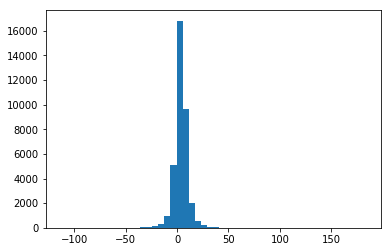

In [15]:
vals = list(differences.values())
plt.hist(vals, bins=50)
mean = np.mean(vals)
std = np.std(vals)
print (mean, std)

In [16]:
highly_deg = {}
for k in differences.keys():
    if differences[k] > mean + 1*std or differences[k] < mean - 1*std:
        highly_deg[k] = differences[k]

In [17]:
len(highly_deg)

6332

## Heatmap of DEG genes

### Plotting

In [295]:
degs = chandni_anova_probes

Even using Chandni's genes, the python plot doesn't look very different...

In [ ]:
#loading
gene_tables = load_obj("anova2_probeset_normed2") #load_obj("anova_results")

In [18]:
#sorting my dictionary by p-value because Chandni's probes are also sorted by p-value
degs = [x[0] for x in sorted(list(degs_dict.items()), key = lambda x : x[1])]

In [231]:
#check for overlap between the gene sets



35

#### formatted like Figure 3.16, Mock Treated vs. Treated

In [214]:
#we want them in this structure: mock treated-> celllines (x4) -> time points, treated celllines (x4) -> time points,
treated_heatmap = []
for line in celllines:
    line_treated = filter_adata(adata, [("cellline", line), ("treatment", "treated")])
    line_treated_filtered = line_treated[:, degs] #list(highly_deg.keys())]
    if len(treated_heatmap) == 0:
        treated_heatmap = line_treated_filtered.X
    else:
        treated_heatmap += line_treated_filtered.X

untreated_heatmap = []
for line in celllines:
    line_treated = filter_adata(adata, [("cellline", line), ("treatment", "untreated")])
    line_treated_filtered = line_treated[:, degs]#list(highly_deg.keys())]
    if len(untreated_heatmap) == 0:
        untreated_heatmap = line_treated_filtered.X
    else:
        untreated_heatmap += line_treated_filtered.X

In [29]:
line_4_treated.obs["timepoint"] #the order the variables show up in

4_1_4_treated      4
4_1_8_treated      8
4_1_12_treated    12
4_1_24_treated    24
4_1_36_treated    36
4_1_48_treated    48
4_1_72_treated    72
4_2_4_treated      4
4_2_8_treated      8
4_2_12_treated    12
4_2_24_treated    24
4_2_36_treated    36
4_2_48_treated    48
4_2_72_treated    72
Name: timepoint, dtype: object

In [133]:
#run this to see raw 56k genes, not DEGS
treated_heatmap = filter_adata(adata, [("treatment", "treated")]).X
untreated_heatmap = filter_adata(adata, [("treatment", "untreated")]).X

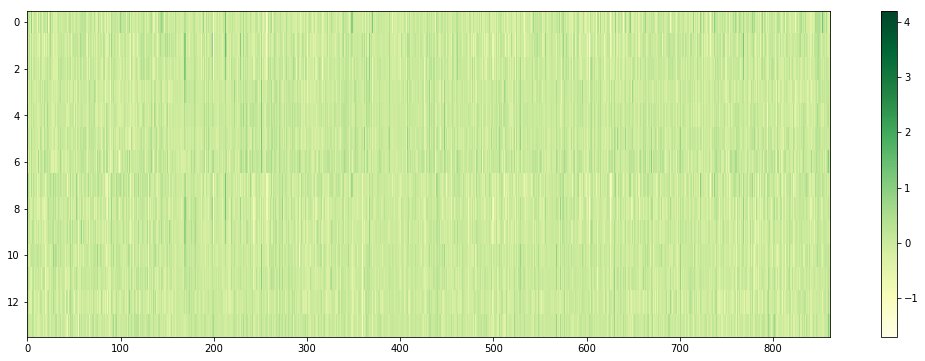

In [215]:
plt.figure(figsize=(18,6))
plt.imshow(treated_heatmap, interpolation='nearest', cmap="YlGn", vmin = -1.7, vmax = 2.2, aspect='auto')
plt.colorbar()
plt.show()

In [131]:
treated_heatmap

ArrayView([[-0.12370933,  0.13361536, -0.06394439, ..., -0.27110052,
            -0.17101772, -0.34607244],
           [-0.00433868,  0.16776544,  0.15242414, ..., -0.29166582,
            -0.22716713, -0.17382911],
           [ 0.15344675,  0.6020541 ,  0.10078736, ..., -0.24613173,
            -0.15698858, -0.07473863],
           ...,
           [ 0.31306443,  0.67285985,  0.35506865, ...,  0.16497593,
            -0.18899678,  0.17137708],
           [ 0.42811152,  0.31678468,  0.35024852, ..., -0.0673086 ,
            -0.23293716,  0.18858747],
           [ 0.21559113,  0.5839228 ,  0.37927276, ...,  0.05648213,
            -0.13310908,  0.17488867]], dtype=float32)

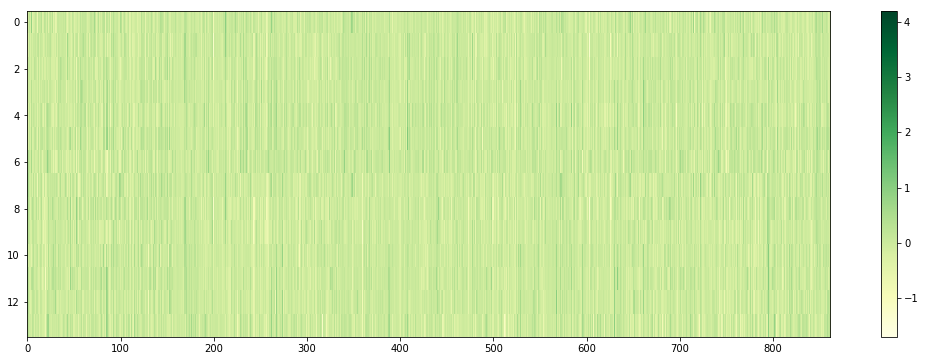

In [216]:
plt.figure(figsize=(18,6))
plt.imshow(untreated_heatmap, interpolation='nearest', cmap="YlGn", vmin = -1.7, vmax = 2.2, aspect='auto')
plt.colorbar()
plt.show()

Doesn't look different, rip.

Also note that Chandni said max expression was at 4.2, where I'm getting 2.2 for the same genes that she use.

#### formatted like Figure 3.17, Sensitive vs. Resistant

celline  4


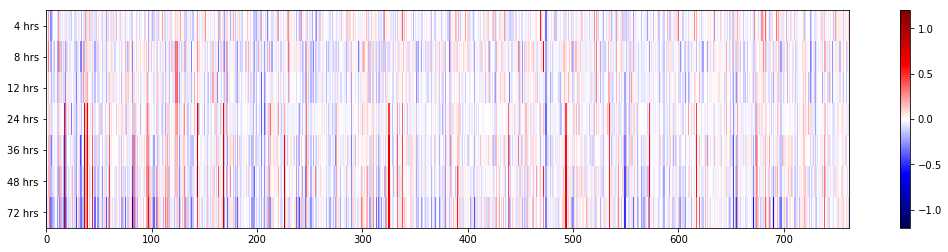

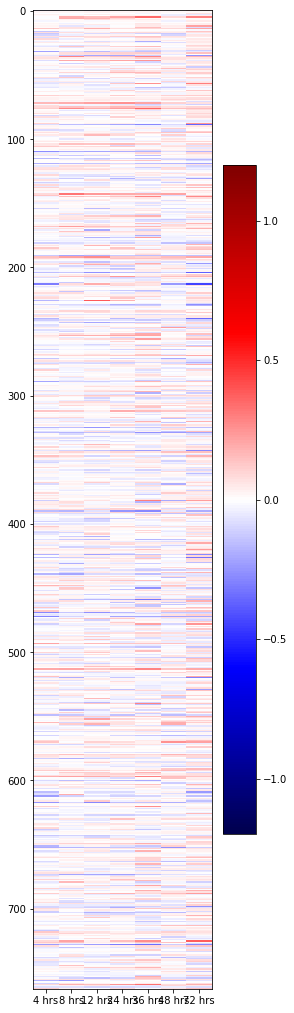

celline  5


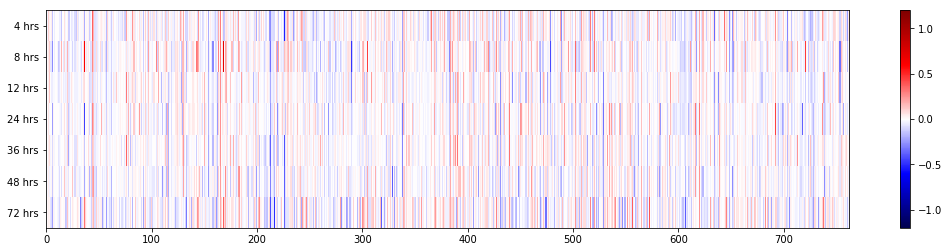

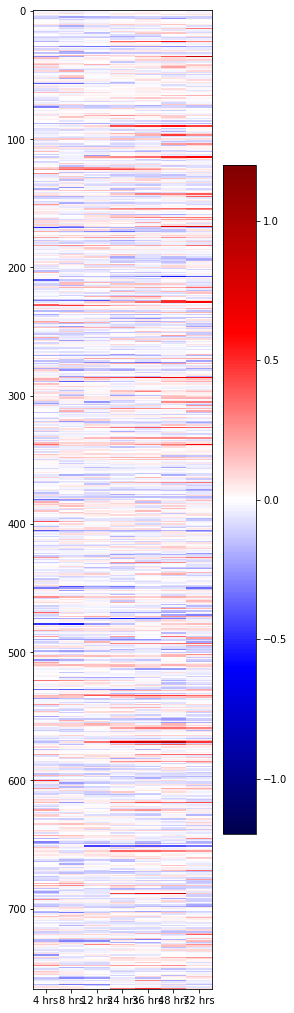

celline  13


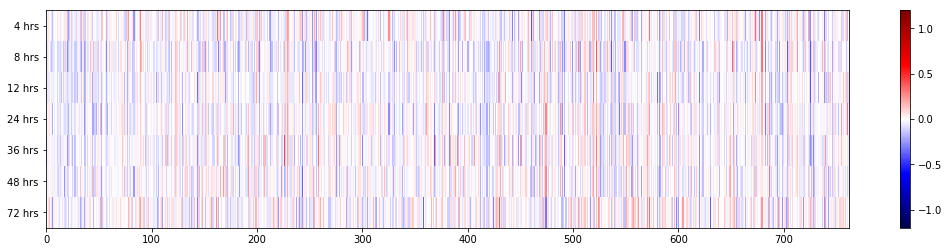

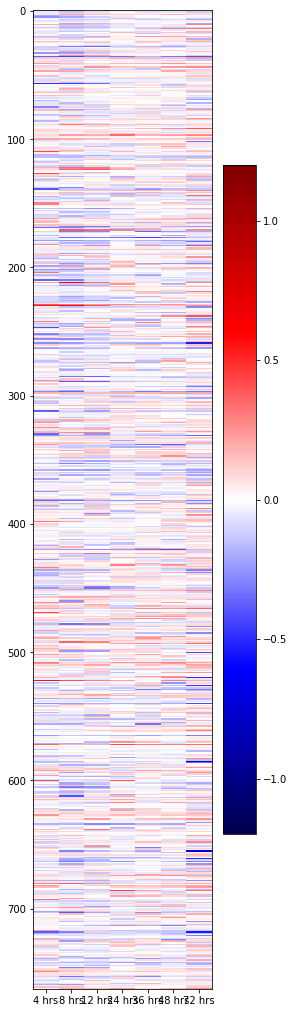

celline  16


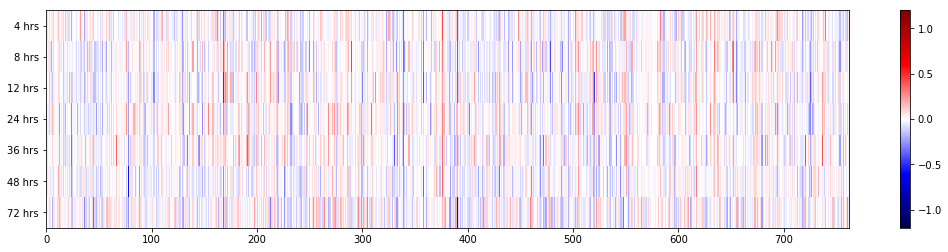

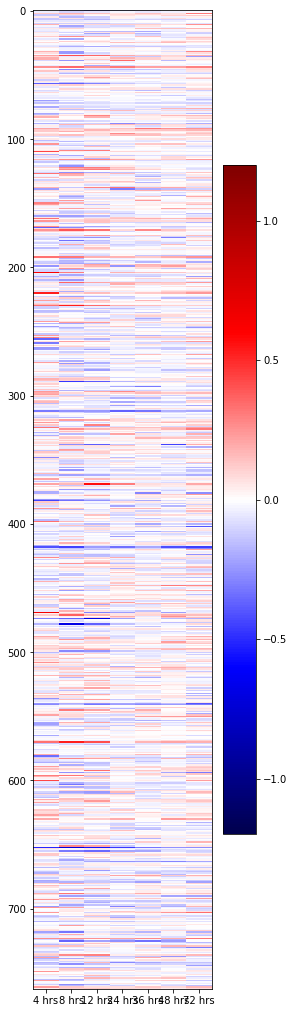

In [31]:
for line in celllines:
    mock_4 = filter_adata(adata, [("cellline", line), ("treatment", "untreated")])[:, degs]
    #arrange replicates so the same time points are next to each other
    mock = []
    for i in range(7):
        mock.append(mock_4.X[i])
        mock.append(mock_4.X[i+7])
    
    #plot
    print ("celline ", line)
    
    plt.figure(figsize=(18, 4))
#     plt.imshow(np.array(mock), interpolation='nearest', cmap = "seismic", vmin = -1.2, vmax = 1.2, aspect='auto')
#     plt.imshow(mock_4.X[:7], interpolation='nearest', cmap = "seismic", vmin = -1.2, vmax = 1.2, aspect='auto')
    plt.imshow(mock_4.X[7:], interpolation='nearest', cmap = "seismic", vmin = -1.2, vmax = 1.2, aspect='auto')    

    plt.yticks(np.arange(len(mock_4.obs["timepoint"][:7])), [str(x) + " hrs" for x in mock_4.obs["timepoint"].values[:7]], rotation="horizontal")
    plt.colorbar()
    plt.show()
    
    treated_4 = filter_adata(adata, [("cellline", line), ("treatment", "treated")])[:, degs]
    #plot
    plt.figure(figsize=(4,18))
    plt.imshow(treated_4.X[:7].T, interpolation='nearest', cmap = "seismic", vmin = -1.2, vmax = 1.2, aspect='auto')
    
    plt.xticks(np.arange(len(mock_4.obs["timepoint"][:7])), [str(x) + " hrs" for x in mock_4.obs["timepoint"].values[:7]], rotation="horizontal")
    plt.colorbar()
    plt.show()

#### Run GSEA

In [130]:
res = run_GSEA(highly_deg)
res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes
Term,,,,,,,
defense response to bacterium (GO:0042742),-0.568957,-2.510250,0.000000,0.001131,242,18,"LYPD8,IGHV3-33,GNLY,IL12B,IGHV4-61,IGHD,IGHV3-..."
positive regulation of cytokine production (GO:0001819),-0.462352,-1.926061,0.014164,0.091611,221,17,"FFAR2,CCR7,IL12B,RGCC,IL10,GBP5,CSF2,AFAP1L2,H..."
central nervous system development (GO:0007417),0.559909,1.972522,0.001497,0.167927,218,16,"CELSR1,NNAT,FYN,CDH2,B3GNT5,PPP1R17,GRIN2A,APO..."
positive regulation of lymphocyte activation (GO:0051251),-0.413171,-1.628071,0.043605,0.247689,105,15,"SIRPB1,CCL2,CCR7,IGHV3-33,IL12B,IGHV4-61,IGHD,..."
antigen receptor-mediated signaling pathway (GO:0050851),-0.335125,-1.664089,0.034483,0.274079,258,25,"FYN,THEMIS,CD4,HLA-DRB4,BTNL9,PSMA8,GRAP2,IGHV..."
phagocytosis (GO:0006909),-0.386331,-1.533745,0.076056,0.320526,136,15,"ITGB3,ALOX15,MERTK,PECAM1,IGHV3-33,SCARB2,IGHV..."
positive regulation of multicellular organismal process (GO:0051240),-0.319039,-1.319915,0.151976,0.347971,203,17,"PRKCH,GCNT2,RBM19,BMPR1A,IL12B,RGCC,HLA-G,ACVR..."
regulation of angiogenesis (GO:0045765),-0.276949,-1.282040,0.190769,0.348914,178,21,"HHEX,PPARG,CHRNA7,SPRY2,THBS4,KLK3,RGCC,SASH1,..."
negative regulation of nucleic acid-templated transcription (GO:1903507),-0.275528,-1.291762,0.143791,0.359745,445,22,"NR2F2,HHEX,PPARG,CTBP2,KDM5C,ZNF418,TBX21,GLIS..."


In [ ]:
#should probably also run ANOVA like in the old analysis

In [132]:
#check for genes that associated with BCNU in the literature
"FOXO1" in differences.keys()

True

In [133]:
differences["FOXO1"] #this is pretty low?

3.94320770187751

I'm not sure if looking at different levels of transcription will tell me much. I think I need to compare untreated to treated, and then compare the difference of that distribution.

In [16]:
line_4_treated_timed = filter_adata(adata, [("cellline", "4"), ("treatment", "treated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_5_treated_timed = filter_adata(adata, [("cellline", "5"), ("treatment", "treated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_16_treated_timed = filter_adata(adata, [("cellline", "16"), ("treatment", "treated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_13_treated_timed = filter_adata(adata, [("cellline", "13"), ("treatment", "treated"), ("timepoint", ["4", "8", "12", "24", "48"])])

In [17]:
line_4_untreated = filter_adata(adata, [("cellline", "4"), ("treatment", "untreated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_5_untreated = filter_adata(adata, [("cellline", "5"), ("treatment", "untreated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_16_untreated = filter_adata(adata, [("cellline", "16"), ("treatment", "untreated"), ("timepoint", ["4", "8", "12", "24", "48"])])
line_13_untreated = filter_adata(adata, [("cellline", "13"), ("treatment", "untreated"), ("timepoint", ["4", "8", "12", "24", "48"])])

In [18]:
#look at which genes are very different between lines 13 and 4 in comparison to 5 and 4
differences2 = {}
for i in range(adata.shape[1]):
    line_5 = np.array(line_5_treated_timed.X.T[i])-np.array(line_5_untreated.X.T[i])
    line_4 = np.array(line_4_treated_timed.X.T[i])-np.array(line_4_untreated.X.T[i])
    line_13 = np.array(line_13_treated_timed.X.T[i])-np.array(line_13_untreated.X.T[i])
    
    similar = sp.ttest_ind(line_5, line_4)[0]
    different = sp.ttest_ind(line_13, line_4)[0]
    differences2[adata.var_names[i]] = similar-different

-0.14400058932290274 1.2204791048260701


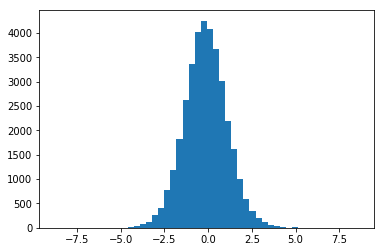

In [19]:
vals = list(differences2.values())
plt.hist(vals, bins=50)
mean = np.mean(vals)
std = np.std(vals)
print (mean, std)

In [20]:
highly_deg2 = {}
for k in differences2.keys():
    if differences2[k] > mean + 2*std or differences2[k] < mean - 2*std:
        highly_deg2[k] = differences2[k]

In [29]:
len(highly_deg2)

1674

In [148]:
res = run_GSEA(highly_deg2)
res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes
Term,,,,,,,
"mRNA splicing, via spliceosome (GO:0000398)",-0.435857,-2.254414,0.001832,0.053153,262,23,"ESS2,RBMX,RBPMS,SNU13,DHX9,GPKOW,SUGP1,PRMT5,E..."
rRNA processing (GO:0006364),-0.372640,-1.795491,0.015957,0.083757,203,19,"RPL24,RPL27,RPS19,RPS13,SNU13,UTP6,UTP11,EIF6,..."
cellular protein metabolic process (GO:0044267),-0.286943,-1.850128,0.012844,0.085390,485,37,"HSPG2,RPL24,RPL27,TXN,RABGGTA,RPS19,RPS13,PNPL..."
rRNA metabolic process (GO:0016072),-0.393686,-1.809879,0.012727,0.085931,201,18,"RPL24,RPL27,RPS19,RPS13,SNU13,UTP6,UTP11,UTP20..."
negative regulation of apoptotic process (GO:0043066),-0.314210,-1.813562,0.020370,0.093401,486,30,"NR4A2,RHBDD1,HMGA2,DDAH2,HIGD2A,CRLF1,PIDD1,KL..."
gene expression (GO:0010467),-0.283387,-1.854963,0.016014,0.094776,412,41,"NR4A2,RPL24,RPL27,TOPORS,RPS19,RPS13,LMF2,SMG1..."
negative regulation of programmed cell death (GO:0043069),-0.367073,-1.945224,0.011342,0.095725,409,24,"RHBDD1,HMGA2,DDAH2,HIGD2A,PIDD1,TOPORS,CIB1,EP..."
translation (GO:0006412),-0.384416,-1.869546,0.016854,0.100073,233,21,"RPL24,EEF2,RPL27,RPS19,RPS13,MRPS7,SNU13,TARS2..."
ribosome biogenesis (GO:0042254),-0.370204,-1.894736,0.003861,0.101779,227,22,"RPL24,RPL27,RPS19,RPS13,ZNF658,SNU13,UTP6,UTP1..."


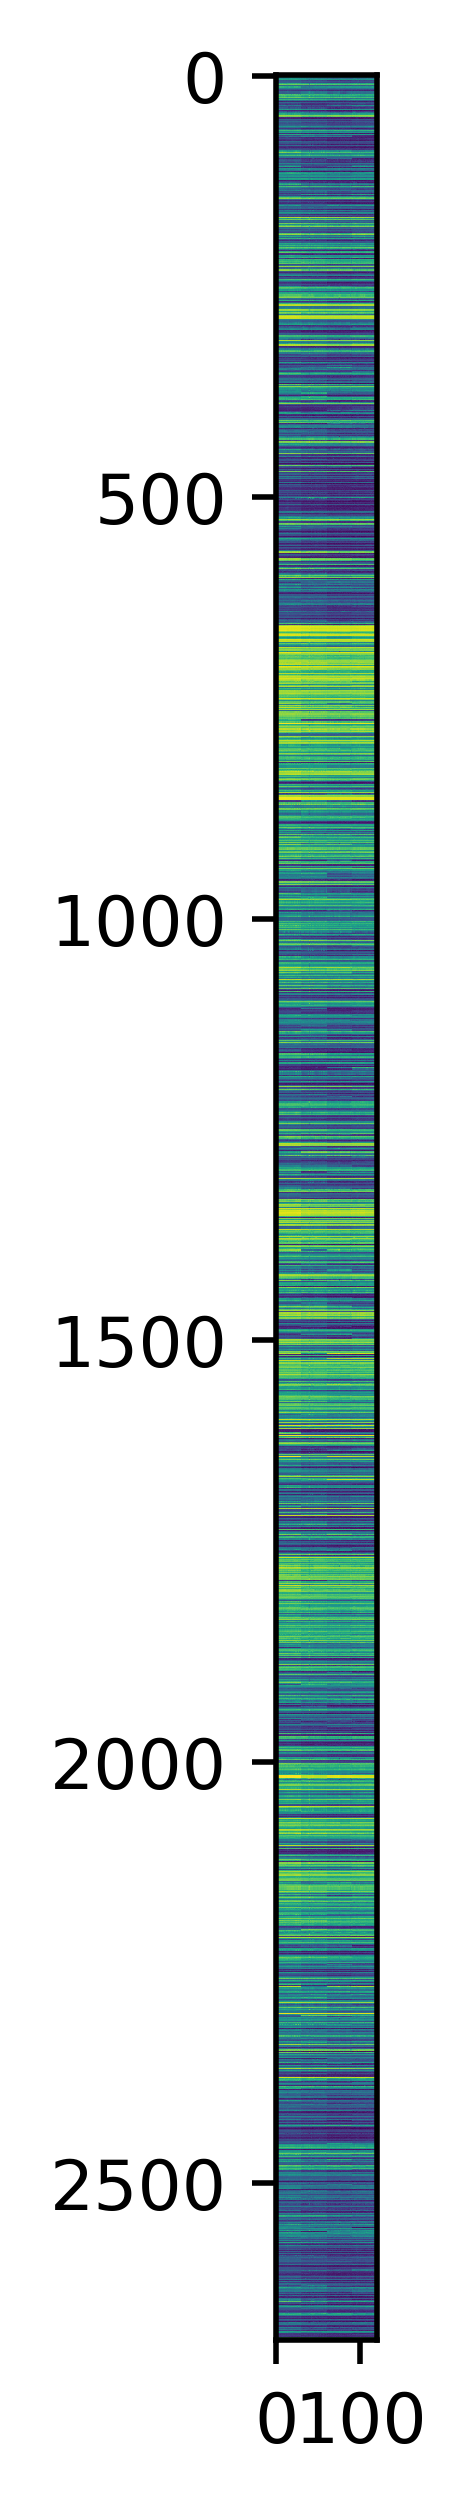

In [45]:
#create a heatmap of the gene expression so we can visualize these differences
deg_adata = adata[:, list(highly_deg2.keys())]

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
plt.imshow(deg_adata.X.T)
plt.show()

In [47]:
adata

AnnData object with n_obs × n_vars = 120 × 54675 
    obs: 'cellline', 'replicate', 'timepoint', 'treatment'

In [58]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(np.array(adata.X), np.array([int(x) for x in adata.obs["cellline"].values]))

TypeError: must be real number, not str

In [54]:
adata.X

array([[ 9.61412  , 11.288549 ,  7.5323133, ...,  3.15335  ,  4.207523 ,
         3.8651178],
       [ 9.317007 , 11.1318245,  7.3110266, ...,  3.1582482,  4.1906314,
         3.9345956],
       [ 9.5570545, 11.149244 ,  7.4296546, ...,  3.0420399,  4.3473134,
         4.2384768],
       ...,
       [ 8.332385 , 10.834907 ,  7.3240075, ...,  2.8425329,  3.577644 ,
         3.3269353],
       [ 8.404764 , 10.54375  ,  7.444113 , ...,  2.7438347,  3.4016907,
         3.3246932],
       [ 8.337829 , 10.586966 ,  7.350737 , ...,  2.792215 ,  3.611557 ,
         3.3361006]], dtype=float32)

## Comparative Heatmap

#### "Raw" Expression Values
Just after RMA processing.

In [10]:
line_4_treated = filter_adata(adata, [("cellline", "4"), ("treatment", "treated")])
line_5_treated = filter_adata(adata, [("cellline", "5"), ("treatment", "treated")])
line_16_treated = filter_adata(adata, [("cellline", "16"), ("treatment", "treated")])
line_13_treated = filter_adata(adata, [("cellline", "13"), ("treatment", "treated")])

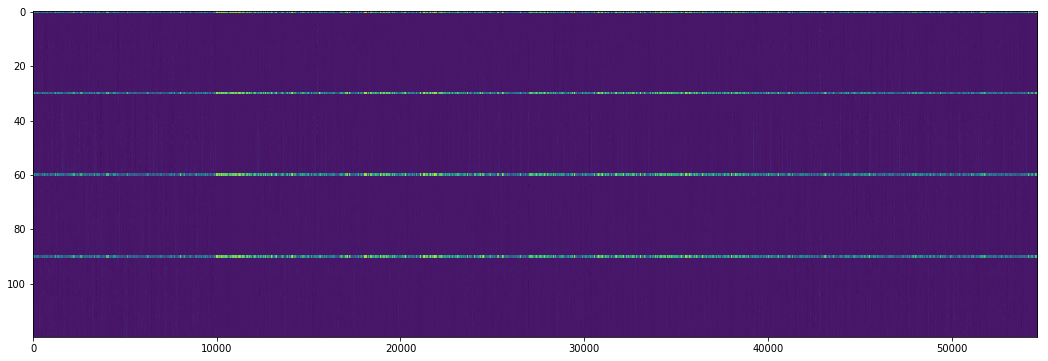

In [93]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(figsize=(18, 6))
ax.imshow(adata.X, interpolation='nearest')
ax.set_aspect('auto')
plt.show()

All of the genes, ordered by probeset with no clustering. Let's try some hierarchical clustering:

In [15]:
adata.X.shape[1]


54675

In [18]:
x[1].shape

(54675,)

In [20]:
x = adata.X.T
l = x.shape[0]
D = scipy.zeros([l, l])
print ("calculating pairwise distance...")
for i in range(l):
    for j in range(l):
        D[i,j] = scipy.spatial.distance.euclidean(x[i], x[j]) #euclidean distance - this takes like an hour, rip
print ("completed distance calculation")
        
# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8]) #?
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

# Display and sav
fig.show()

starting distance calculation


KeyboardInterrupt: 

4 treated


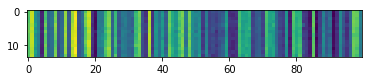

5 treated


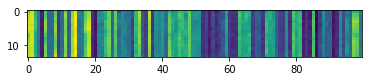

13 treated


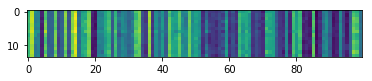

16 treated


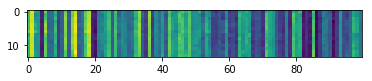

4 untreated


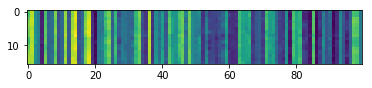

5 untreated


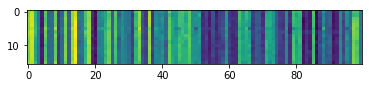

13 untreated


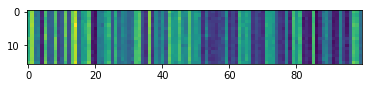

16 untreated


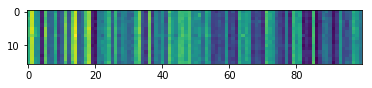

In [52]:
for label in ["treated", "untreated"]:
    for cl in celllines:
        line = filter_adata(adata, [("cellline", cl), ("treatment", label)])
        print (cl, label)
        plt.imshow(line.X[:, :100])
        plt.show()

## ANOVA

### ANOVA values from Chandni

In [11]:
import scipy.io
matrix = scipy.io.loadmat("ComputationalAnalyses/ANOVA/ExpData.mat")
matrix

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Aug 22 20:41:46 2010',
 '__version__': '1.0',
 '__globals__': [],
 'ExpData': array([[(array([[array(['discoidin domain receptor tyrosine kinase 1, DDR1'], dtype='<U49')],
        [array(['replication factor C (activator 1) 2, 40kDa, RFC2'], dtype='<U49')],
        [array(["heat shock 70kDa protein 6 (HSP70B'), HSPA6"], dtype='<U43')],
        ...,
        [array([], dtype='<U1')],
        [array([], dtype='<U1')],
        [array([], dtype='<U1')]], dtype=object), array([[array(['1007_s_at'], dtype='<U9')],
        [array(['1053_at'], dtype='<U7')],
        [array(['117_at'], dtype='<U6')],
        ...,
        [array(['AFFX-r2-Ec-bioD-5_at'], dtype='<U20')],
        [array(['AFFX-r2-P1-cre-3_at'], dtype='<U19')],
        [array(['AFFX-r2-P1-cre-5_at'], dtype='<U19')]], dtype=object), array([[(array([[(array([[(array([[  591.11717433,   791.83646587],
        [ 1605.31457895,  1524.52246673],
        [  148.68898449

Hmm... these values look nothing like mine, they're too large?

### Python - Yuge implementation of ANOVA

#### Functions

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
def run_anova(adata, parameters):
    #make new dataframe for ANOVA
    metadata = {}
    if "sensitivity" in parameters:
        metadata["sensitivity"] = ["sensitive" if x == "4" or x == "5" else "resistant" for x in adata.obs["cellline"].values]
    if "treatment" in parameters:
        metadata["treatment"] = adata.obs["treatment"]
    if "timepoints" in parameters:
        print ("timepoints not implemented")
        return
    
    gene_tables = {}

    print ("calculating anova...")
    formula = "gene ~ "
    if len(parameters) == 1:
        formula += "C(" + parameters[0] + ")"
    else:
        for term in parameters:
            formula += "C(" + term + ")*"
        formula = formula[:len(formula)-1] #remove the last "*"
    
    for i, gene in enumerate(adata.var_names):
        d = metadata.copy()
        for term in parameters:
            d["gene"] = adata[:, gene].X
        data = pd.DataFrame(d)
        lm = ols(formula, data=data).fit()
        table = sm.stats.anova_lm(lm, typ=2)
        
        gene_tables[gene] = table

        if i%5000 == 0:
            print ("done with ", i)

    print ("done")
    return gene_tables
    
def filter_anova_result(gene_tables, threshold = .05):
    degs_dict = {}

    for gene in gene_tables.keys():
        table = gene_tables[gene]
        if table["PR(>F)"].values[2] < threshold:
            degs_dict[gene] = table["PR(>F)"].values[-2] #multiply by 100 because of the pvalue for GSEA 

    print (len(degs_dict))
    return degs_dict

#### Running ANOVA on full dataset

In [43]:
gene_tables = run_anova(adata, ["treatment", "sensitivity"])

calculating anova...
done with  0
done with  5000
done with  10000
done with  15000
done with  20000
done with  25000
done with  30000
done with  35000
done with  40000
done with  45000
done with  50000
done


In [44]:
gene_tables["1487_at"]#["PR(>F)"].values[-2]

,sum_sq,df,F,PR(>F)
C(treatment),0.049203,1.0,0.256044,6.138111e-01
C(sensitivity),11.583842,1.0,60.279981,3.578989e-12
C(treatment):C(sensitivity),0.029440,1.0,0.153202,6.962123e-01
Residual,22.291409,116.0,NaN,NaN


The "sensitivity" parameter is clearly a factor on variance, probably because they are different celllines and thus have definitively different expression patterns. However, "treatment" spans the same celline, so it more accurately controls for between-cellline effects. Hence, we will filter the genes by treatment x sensitivity p-values.

In [45]:
#saving
save_obj(gene_tables, "anova2_gene_table") 

#### Loading and Writing gene lists

In [13]:
#loading
gene_tables = load_obj("anova2_gene_table")

In [18]:
degs_dict = filter_anova_result(gene_tables, threshold = .01)

556


In [19]:
overlap(chandni_anova_probes, list(degs_dict.keys()))

382


In [81]:
with open('yuge/gene_lists/anova_pval02_genes.txt', 'w') as f:
    for probe in list(degs_dict.keys()):
        f.write("%s\n" % probe)

#### Running ANOVA on Replicate 1, celline 4

In [14]:
rep1_adata = filter_adata(adata, [("replicate", "1")])

In [19]:
rep1_gene_tables = run_anova(rep1_adata, ["treatment", "sensitivity"])

calculating anova...
done with  0
done with  5000
done with  10000
done with  15000
done with  20000
done with  25000
done with  30000
done with  35000
done with  40000
done with  45000
done with  50000
done


In [20]:
save_obj(rep1_gene_tables, "rep1_gene_table")

In [29]:
rep1_degs = filter_anova_result(rep1_gene_tables, threshold = .05)

1225


In [30]:
overlap(rep1_degs.keys(), chandni_anova_probes)

360


In [31]:
with open('yuge/gene_lists/rep1_anova_genes.txt', 'w') as f:
    for probe in rep1_degs.keys():
        f.write("%s\n" % probe)

#### Running ANOVA on Replicate 2

In [21]:
rep2_adata = filter_adata(adata, [("replicate", "2")])
rep2_gene_tables = run_anova(rep2_adata, ["treatment", "sensitivity"])

calculating anova...
done with  0
done with  5000
done with  10000
done with  15000
done with  20000
done with  25000
done with  30000
done with  35000
done with  40000
done with  45000
done with  50000
done


In [22]:
save_obj(rep2_gene_tables, "rep2_gene_table")

In [23]:
rep2_degs = filter_anova_result(rep2_gene_tables)

979


In [24]:
overlap(rep2_degs.keys(), chandni_anova_probes)

357


In [32]:
with open('yuge/gene_lists/rep2_anova_genes.txt', 'w') as f:
    for probe in rep2_degs.keys():
        f.write("%s\n" % probe)

In [28]:
#final comparison
overlap(rep2_degs.keys(), rep1_degs.keys())

211


# Hierarchical Clustering

In [14]:
rep2_adata = filter_adata(adata, [("replicate", "2")])
rep2_adata

View of AnnData object with n_obs × n_vars = 56 × 54675 
    obs: 'cellline', 'replicate', 'timepoint', 'treatment'

In [17]:
rep2_adata = rep2_adata[:, chandni_anova_probes]

In [22]:
#with my own anova degs
# gene_table = load_obj("rep1_cl13_gene_table")
# degs = filter_anova_result(gene_table, threshold = .05)

In [18]:
x = rep2_adata.X.T
l = x.shape[0]
D = scipy.zeros([l, l])
print ("calculating pairwise distance...")
for i in range(l):
    for j in range(l):
        D[i,j] = scipy.spatial.distance.euclidean(x[i], x[j]) #euclidean distance - this takes like an hour, rip
print ("completed distance calculation")

save_obj(D, "shc_distance")

calculating pairwise distance...
completed distance calculation


In [30]:
rep2_adata.X.shape

(56, 1091)

/home/yji/.local/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


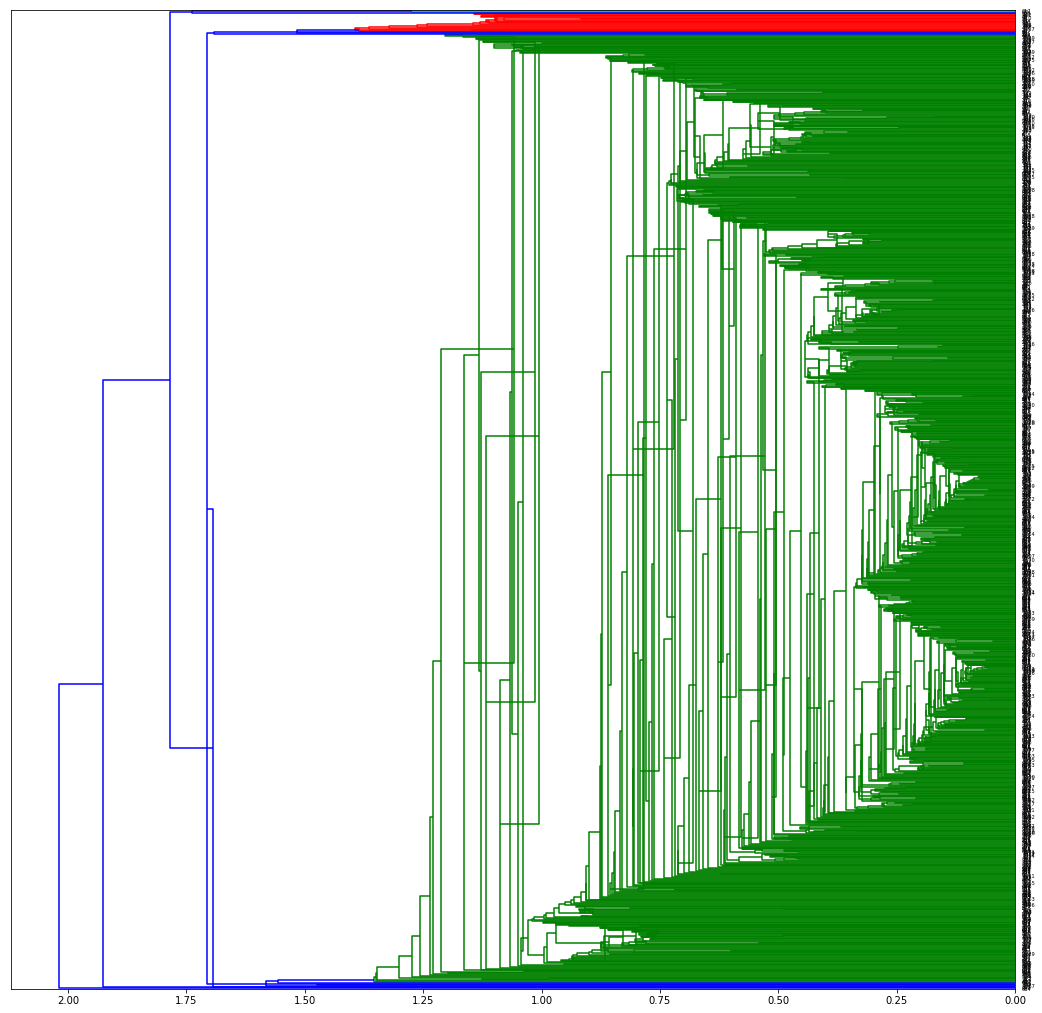

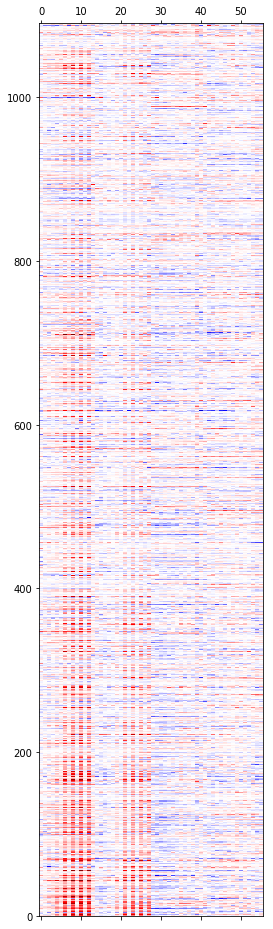

In [35]:
# D = load_obj("shc_distance") #use to load data

# Compute and plot dendrogram.
plt.figure(figsize=(18, 18))
# fig = pylab.figure(figsize=(18, 18))
# axdendro = fig.add_axes([0.09,0.1,0.2,0.8]) #?
Y = sch.linkage(rep2_adata.X.T, method='centroid') #the linkage and dedrogram... are the hierarchical clustering thing...??
Z = sch.dendrogram(Y, orientation='left')
# axdendro.set_xticks([])
# axdendro.set_yticks([])

# Plot distance matrix.
# axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
# index = Z['leaves']
# D = D[index,:]
# D = D[:,index]
# im = axmatrix.matshow(D, aspect='auto', origin='lower')
# axmatrix.set_xticks([])
# axmatrix.set_yticks([])
plt.matshow(rep2_adata.X.T, aspect = "auto", origin = "lower", cmap = "seismic", vmin = -1.2, vmax = 1.2)
# plt.imshow(rep2_adata.X.T, interpolation='nearest', cmap = "seismic", aspect='auto') #vmin = -colormap_range, vmax = colormap_range

# # Plot colorbar.
# # axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
# pylab.colorbar(im)

# Display and sav
fig.show()